# Data Analysis Project

Import data

In [ ]:
#install needed module
%pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 7.3 MB/s eta 0:00:00


In [ ]:
#import needed library
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

Authenticate without a specific user; allows to access general features of Spotify, and see playlists.

Requires a Spotify for Developers Account:
https://developer.spotify.com/dashboard

Step 1) Create an App

Step 2) Get the app client id and put it into the cid variable below

Step 3) Get the app secret id and put it into the secret variable below

In [ ]:
#authenticate without a specific user
cid = "0d990ee98f1549d6aa06579805cf58d7"
secret =  "9d3e2549a9f94b6b8158178161a064aa"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

Enter selected playlist, get each track's info

**bold text**## Top 50 tracks Analysis
To get a better sense of what features in the dataset result in people liking a song

In [ ]:
playlist_link = "https://open.spotify.com/playlist/5ABHKGoOzxkaa28ttQV9sE?si=UcFFHgJ1Rsm4YIT2LDBS4A"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

Get info for each track in the playlist

In [ ]:
#Create arrays for different columns of dataset
track_uri = []
track_name = []
track_pop = []
artist_name= []
artist_uris = []
artist_pop = []
album_name = []
album_uri = []
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #Track
    track_uri.append(track["track"]["uri"])
    track_name.append(track["track"]["name"])
    track_pop.append(track["track"]["popularity"])

    #Artist Info
    artist_name.append(track["track"]["artists"][0]["name"])
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_uris.append(artist_uri)
    artist_info = sp.artist(artist_uri)
    artist_pop.append(artist_info["popularity"])
    # artist_info.append(sp.artist(artist_uri))

    #Album
    album_name.append(track["track"]["album"]["name"])
    album = track["track"]["album"]["uri"]

In [ ]:
import pandas as pd
dfTop100 = {'track_popularity': track_pop, 
            'track_name': track_name, 
            'track_uri': track_uri, 
            'artist_name': artist_name, 
            'artist_popularity': artist_pop,
            'album_name': album_name,
            }
dfTop100 = pd.DataFrame(data = dfTop100)
dfTop100.head()

,track_popularity,track_name,track_uri,artist_name,artist_popularity,album_name
0,88,Blinding Lights,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,99,After Hours
1,84,Shape of You,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,93,÷ (Deluxe)
2,75,Dance Monkey,spotify:track:2XU0oxnq2qxCpomAAuJY8K,Tones And I,73,Dance Monkey (Stripped Back) / Dance Monkey
3,85,Someone You Loved,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,84,Divinely Uninspired To A Hellish Extent
4,0,rockstar,spotify:track:7wGoVu4Dady5GV0Sv4UIsx,Post Malone,90,rockstar


In [ ]:
#Add song characteristics information
def addAudioFeature(x, characteristic):
        return sp.audio_features(x)[0][characteristic]

please refer to [the spotify api documentation about info for these fields](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

In [ ]:
dfTop100['danceability']= dfTop100['track_uri'].map(lambda x: addAudioFeature(x, 'danceability'))
dfTop100['acousticness']= dfTop100['track_uri'].map(lambda x: addAudioFeature(x, 'acousticness'))
dfTop100['energy']= dfTop100['track_uri'].map(lambda x: addAudioFeature(x, 'energy'))
dfTop100['instrumentalness']= dfTop100['track_uri'].map(lambda x: addAudioFeature(x, 'instrumentalness'))
dfTop100['music_key']= dfTop100['track_uri'].map(lambda x: addAudioFeature(x, 'key'))
dfTop100['liveness']= dfTop100['track_uri'].map(lambda x: addAudioFeature(x, 'liveness'))
dfTop100['loudness']= dfTop100['track_uri'].map(lambda x: addAudioFeature(x, 'loudness'))
dfTop100['mode']= dfTop100['track_uri'].map(lambda x: addAudioFeature(x, 'mode'))
dfTop100['speechiness']= dfTop100['track_uri'].map(lambda x: addAudioFeature(x, 'speechiness'))
dfTop100['tempo']= dfTop100['track_uri'].map(lambda x: addAudioFeature(x, 'tempo'))
dfTop100['time_signature']= dfTop100['track_uri'].map(lambda x: addAudioFeature(x, 'time_signature'))
dfTop100['valence']= dfTop100['track_uri'].map(lambda x: addAudioFeature(x, 'valence'))
dfTop100['duration_ms']= dfTop100['track_uri'].map(lambda x: addAudioFeature(x, 'duration_ms'))

In [ ]:
dfTop100.head()

,track_popularity,track_name,track_uri,artist_name,artist_popularity,album_name,danceability,acousticness,energy,instrumentalness,music_key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_ms
0,88,Blinding Lights,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,99,After Hours,0.514,0.00146,0.730,0.000095,1,0.0897,-5.934,1,0.0598,171.005,4,0.334,200040
1,84,Shape of You,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,93,÷ (Deluxe),0.825,0.58100,0.652,0.000000,1,0.0931,-3.183,0,0.0802,95.977,4,0.931,233713
2,75,Dance Monkey,spotify:track:2XU0oxnq2qxCpomAAuJY8K,Tones And I,73,Dance Monkey (Stripped Back) / Dance Monkey,0.824,0.69200,0.588,0.000104,6,0.1490,-6.400,0,0.0924,98.027,4,0.513,209438
3,85,Someone You Loved,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,84,Divinely Uninspired To A Hellish Extent,0.501,0.75100,0.405,0.000000,1,0.1050,-5.679,1,0.0319,109.891,4,0.446,182161
4,0,rockstar,spotify:track:7wGoVu4Dady5GV0Sv4UIsx,Post Malone,90,rockstar,0.577,0.13000,0.522,0.000090,5,0.1420,-6.594,0,0.0984,159.772,4,0.119,218320


## EDA: First look at Data
Let's begin by looking at the general shape of the data and a look at the data:

In [ ]:
dfTop100.head()


,track_popularity,track_name,track_uri,artist_name,artist_popularity,album_name,danceability,acousticness,energy,instrumentalness,music_key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_ms
0,88,Blinding Lights,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,99,After Hours,0.514,0.00146,0.730,0.000095,1,0.0897,-5.934,1,0.0598,171.005,4,0.334,200040
1,84,Shape of You,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,93,÷ (Deluxe),0.825,0.58100,0.652,0.000000,1,0.0931,-3.183,0,0.0802,95.977,4,0.931,233713
2,75,Dance Monkey,spotify:track:2XU0oxnq2qxCpomAAuJY8K,Tones And I,73,Dance Monkey (Stripped Back) / Dance Monkey,0.824,0.69200,0.588,0.000104,6,0.1490,-6.400,0,0.0924,98.027,4,0.513,209438
3,85,Someone You Loved,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,84,Divinely Uninspired To A Hellish Extent,0.501,0.75100,0.405,0.000000,1,0.1050,-5.679,1,0.0319,109.891,4,0.446,182161
4,0,rockstar,spotify:track:7wGoVu4Dady5GV0Sv4UIsx,Post Malone,90,rockstar,0.577,0.13000,0.522,0.000090,5,0.1420,-6.594,0,0.0984,159.772,4,0.119,218320


In [ ]:
dfTop100.tail()

,track_popularity,track_name,track_uri,artist_name,artist_popularity,album_name,danceability,acousticness,energy,instrumentalness,music_key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_ms
95,74,Wonderwall - Remastered,spotify:track:7ygpwy2qP3NbrxVkHvUhXY,Oasis,79,(What's The Story) Morning Glory? (Deluxe Rema...,0.375,0.000509,0.893,0.0,2,0.1870,-4.097,1,0.0406,174.323,4,0.434,258773
96,86,No Role Modelz,spotify:track:68Dni7IE4VyPkTOH9mRWHr,J. Cole,89,2014 Forest Hills Drive,0.690,0.324000,0.521,0.0,10,0.0534,-8.492,0,0.3390,100.028,4,0.494,292799
97,81,That's What I Like,spotify:track:0KKkJNfGyhkQ5aFogxQAPU,Bruno Mars,91,24K Magic,0.853,0.013000,0.560,0.0,1,0.0944,-4.961,1,0.0406,134.066,4,0.860,206693
98,79,The Box,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,Roddy Ricch,82,Please Excuse Me for Being Antisocial,0.896,0.104000,0.586,0.0,10,0.7900,-6.687,0,0.0559,116.971,4,0.642,196653
99,83,Till I Collapse,spotify:track:4xkOaSrkexMciUUogZKVTS,Eminem,94,The Eminem Show,0.548,0.062200,0.847,0.0,1,0.0816,-3.237,1,0.1860,171.447,4,0.100,297787


In [ ]:
dfTop100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_popularity   100 non-null    int64  
 1   track_name         100 non-null    object 
 2   track_uri          100 non-null    object 
 3   artist_name        100 non-null    object 
 4   artist_popularity  100 non-null    int64  
 5   album_name         100 non-null    object 
 6   danceability       100 non-null    float64
 7   acousticness       100 non-null    float64
 8   energy             100 non-null    float64
 9   instrumentalness   100 non-null    float64
 10  music_key          100 non-null    int64  
 11  liveness           100 non-null    float64
 12  loudness           100 non-null    float64
 13  mode               100 non-null    int64  
 14  speechiness        100 non-null    float64
 15  tempo              100 non-null    float64
 16  time_signature     100 non-

Pulling data straight from the spotify api we can see that no data is missing. This is crucial for further data preprocessing.

Let us now investigate the summary statistics

In [ ]:
dfTop100.describe()

,track_popularity,artist_popularity,danceability,acousticness,energy,instrumentalness,music_key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_ms
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,59.000000,80.570000,0.658780,0.242347,0.628640,0.008777,5.260000,0.164568,-6.178680,0.610000,0.096432,121.06174,4.000000,0.502730,214547.440000
std,32.701589,19.168184,0.144703,0.254247,0.161175,0.052243,3.617075,0.120947,2.174489,0.490207,0.091026,29.78458,0.142134,0.225876,40981.630414
min,0.000000,22.000000,0.327000,0.000243,0.264000,0.000000,0.000000,0.034400,-13.448000,0.000000,0.023200,71.10500,3.000000,0.059000,119133.000000
25%,38.000000,79.000000,0.557750,0.028900,0.523750,0.000000,1.000000,0.094200,-7.224750,0.000000,0.039925,98.02200,4.000000,0.339250,187766.500000
50%,78.000000,86.500000,0.688000,0.164000,0.636000,0.000000,6.000000,0.112000,-5.910000,1.000000,0.057600,116.51000,4.000000,0.486000,209379.000000
75%,82.000000,90.250000,0.762500,0.374500,0.752500,0.000084,8.000000,0.184000,-4.698000,1.000000,0.107250,141.00475,4.000000,0.664250,239977.000000
max,89.000000,100.000000,0.921000,0.934000,0.991000,0.465000,11.000000,0.790000,-1.860000,1.000000,0.438000,186.05400,5.000000,0.966000,354320.000000


In [ ]:
dfTop100['time_signature'].value_counts()

4    98
3     1
5     1
Name: time_signature, dtype: int64

In [ ]:
dfTop100.to_csv("./spotifyTop100.csv")

Focusing on the mean values we can get a sense of what characteristic the most popular songs have:
1. Danceability: On average, songs featured on this list **have a danceability of 0.65/1**. Suggesting that people tend to like songs that are more danceable
2. **The overwhelming majority of top songs are written in 4/4 time**. Only two 

**Correlation Analysis**

In [ ]:
#get correlation matrix
corr = dfTop100.corr()
corr

,track_popularity,artist_popularity,danceability,acousticness,energy,instrumentalness,music_key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_ms
track_popularity,1.000000,0.176421,0.114496,0.167873,-0.144468,-9.713014e-02,0.169170,-0.181749,-0.015264,0.091366,-0.107873,-0.012578,-1.868947e-01,0.068364,0.091340
artist_popularity,0.176421,1.000000,-0.074737,0.018870,-0.090901,-2.023542e-01,-0.045137,0.012772,0.232876,0.083021,-0.003295,0.032191,2.224527e-02,-0.212104,0.077006
danceability,0.114496,-0.074737,1.000000,-0.147896,-0.038298,-8.525243e-02,0.175401,-0.001584,-0.065828,-0.180645,0.177207,-0.136934,-1.193429e-01,0.469001,-0.220538
acousticness,0.167873,0.018870,-0.147896,1.000000,-0.716131,-1.225686e-01,-0.010202,-0.155943,-0.453994,0.152039,0.060961,-0.258715,-2.149505e-02,-0.095606,-0.048117
energy,-0.144468,-0.090901,-0.038298,-0.716131,1.000000,1.197318e-01,0.052055,0.062761,0.693228,-0.113276,-0.047259,0.251554,5.247055e-02,0.216706,0.026926
instrumentalness,-0.097130,-0.202354,-0.085252,-0.122569,0.119732,1.000000e+00,-0.047954,0.107657,-0.046151,-0.054388,-0.014791,0.018828,-1.864207e-16,0.010715,0.035883
music_key,0.169170,-0.045137,0.175401,-0.010202,0.052055,-4.795408e-02,1.000000,0.054492,0.022713,-0.198589,0.164782,-0.071575,-1.571809e-01,0.142006,-0.069365
liveness,-0.181749,0.012772,-0.001584,-0.155943,0.062761,1.076573e-01,0.054492,1.000000,0.066999,-0.166629,-0.039323,-0.070465,1.821519e-02,-0.128794,-0.106082
loudness,-0.015264,0.232876,-0.065828,-0.453994,0.693228,-4.615115e-02,0.022713,0.066999,1.000000,0.041510,-0.260579,0.140180,-2.284480e-02,0.117799,0.046641
mode,0.091366,0.083021,-0.180645,0.152039,-0.113276,-5.438804e-02,-0.198589,-0.166629,0.041510,1.000000,-0.188035,0.027822,-1.449732e-01,-0.107877,0.170788


Taking an initial look at the matrix, there seems to be generally weak correlation between most of the columns of the dataset. A lot of the values are close to positive or negative zero. Let's perform a more in-depth analysis.

In [ ]:
import seaborn as sns

<AxesSubplot:>

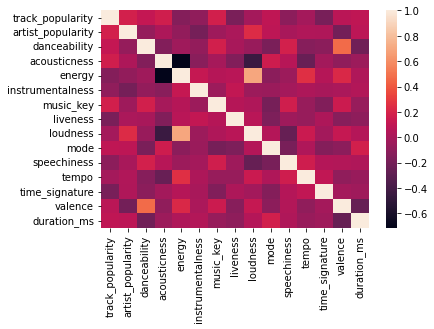

In [ ]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

From the heat map above, we can see that there is a mildly strong negative correlation between the energy and acousticness, and a bit of a lesser negative correlation between the accousticness and the loudness. On the other hand, there is a strong postive correlation between loudness and energy, which makes sense in relation to both of those feature's negative correlations with accousticness.

Here are the definitions of each of these properties:

Acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

Energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

Based on this, we can see that the algorithm considers songs which are more accousitic to be less intense, fast, and noisy (as described in the energy section) and are generally less loud.

Additionally, we can see that there is a negative correlation between valence and duration. Valence is an attribute that is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). While the duration attribute is the length of the track in milliseconds. This signifies that songs which were more positive were generally shorter than those which were sad. This is something that is very interesting and may reveal a very interesting hypotheses on human psychology; that humans can enjoy songs which are sad or otherwise angry for longer periods of time.